In [1]:
import torch 
import os
import sys
import numpy as np
import pandas as pd
# show all columns when printing pandas dataframe
pd.set_option('display.max_columns', None)

from summary import class_wise_summary

import matplotlib.pyplot as plt
plt.rcParams.update({
    'axes.titlesize': 14,    # Font size for plot titles
    'axes.labelsize': 12,    # Font size for x and y labels
    'xtick.labelsize': 10,   # Font size for x tick labels
    'ytick.labelsize': 10,   # Font size for y tick labels
    'legend.fontsize': 10,   # Font size for the legend
    'font.size': 12     ,     # Default font size
    'font.family': 'serif',
})

In [2]:
path = r'E:\Thesis\outputs\01_finalised_models'
modelbasenames = [
    '44946_20240524_s2_scratch',
    '45091_20240529_siam_18_scratch',
    '44948_20240524_siam_33_scratch',
    '44949_20240524_siam_48_scratch',
    '44975_20240525_siam_96_scratch',
    '44993_20240526_s2_siam_96_scratch',

    '44961_20240524_single_recon_fe',
    '44996_20240527_single_segsiam_fe',
    '45142_20240530_dual_fe',

    '45489_20240607_single_recon_ft',
    '45000_20240527_single_segsiam_ft',
    '45452_20240606_dual_ft'
]

In [3]:

name_dict = {
    0: 'na',
    1: 'water',
    2: 'tree',
    3: 'grass',
    4: 'flood',
    5: 'crop',
    6: 'scrub',
    7: 'built',
    8: 'bare_gr',
    9: 'snow',
    10: 'cloud'
}

In [4]:
df = class_wise_summary(path, modelbasenames[0])
df

,na,water,tree,grass,flood,crop,scrub,built,bare_gr,snow,cloud,basename,model
0,0.120482,0.664179,0.333333,0.106195,0.0,0.29932,0.204403,0.518519,0.147059,0.823529,0.257426,44946_20240524_s2_scratch,s2_scratch


In [5]:
summary_df = pd.DataFrame()
for modelbasename in modelbasenames:
    df = class_wise_summary(path, modelbasename)
    summary_df= pd.concat([summary_df, df], axis=0)

In [6]:
summary_df

,na,water,tree,grass,flood,crop,scrub,built,bare_gr,snow,cloud,basename,model
0,0.120482,0.664179,0.333333,0.106195,0.000000,0.299320,0.204403,0.518519,0.147059,0.823529,0.257426,44946_20240524_s2_scratch,s2_scratch
0,0.107759,0.601504,0.295154,0.009804,0.250000,0.224852,0.204698,0.525000,0.029703,0.891089,0.465347,45091_20240529_siam_18_scratch,siam_18_scratch
0,0.106383,0.618321,0.307692,0.000000,0.125000,0.239726,0.210169,0.547619,0.158416,0.900000,0.504950,44948_20240524_siam_33_scratch,siam_33_scratch
0,0.096639,0.786408,0.300412,0.019048,0.299145,0.194631,0.224806,0.575000,0.275862,0.919192,0.500000,44949_20240524_siam_48_scratch,siam_48_scratch
0,0.093878,0.769231,0.359375,0.039216,0.339286,0.254658,0.242424,0.559055,0.241667,0.919192,0.490196,44975_20240525_siam_96_scratch,siam_96_scratch
0,0.100000,0.790476,0.377451,0.067961,0.407080,0.345324,0.226766,0.666667,0.304762,0.885714,0.444444,44993_20240526_s2_siam_96_scratch,s2_siam_96_scratch
0,0.115207,0.625899,0.262976,0.000000,0.000000,0.158537,0.151976,0.342342,0.150442,0.762376,0.333333,44961_20240524_single_recon_fe,single_recon_fe
0,0.118182,0.628571,0.355769,0.121739,0.218182,0.220859,0.193103,0.456140,0.229358,0.850000,0.396040,44996_20240527_single_segsiam_fe,single_segsiam_fe
0,0.111588,0.621429,0.288618,0.029412,0.000000,0.175758,0.172956,0.405172,0.200000,0.761905,0.295918,45142_20240530_dual_fe,dual_fe
0,0.120833,0.649635,0.341121,0.038462,0.166667,0.317881,0.208723,0.526786,0.116505,0.801980,0.380000,45489_20240607_single_recon_ft,single_recon_ft


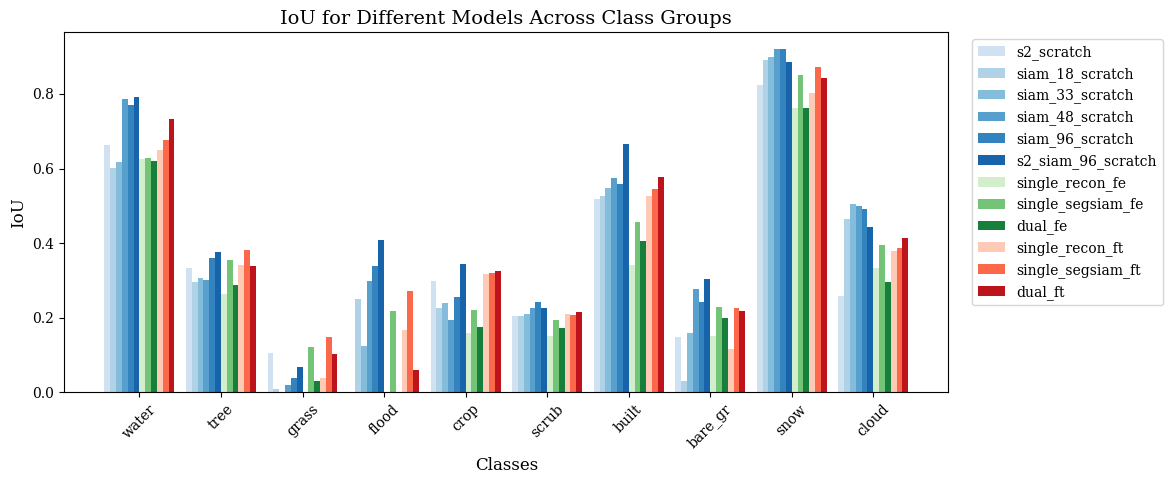

In [7]:
df = summary_df
class_names = df.columns[1:-2]
models = df['model'].unique()

# Create a color map for models
color_map = {
    'scratch': 'Blues',
    'fe': 'Greens',
    'ft': 'Reds'
}

# Adjust the gradient range to avoid color blur
def get_colors(model_list, cmap_name):
    cmap = plt.get_cmap(cmap_name)
    return cmap(np.linspace(0.2, 0.8, len(model_list)))

# Assign colors to each model
colors = []
scratch_models = [model for model in models if 'scratch' in model]
fe_models = [model for model in models if 'fe' in model]
ft_models = [model for model in models if 'ft' in model]

colors.extend(get_colors(scratch_models, color_map['scratch']))
colors.extend(get_colors(fe_models, color_map['fe']))
colors.extend(get_colors(ft_models, color_map['ft']))

# Set up the plot
plt.figure(figsize=(12, 5))

# Define width of a bar and the width of a gap
bar_width = 0.2
gap_width = 0.4

# Define the number of classes and models
num_classes = len(class_names)
num_models = len(models)

# Define positions for the bars
positions = np.arange(num_classes) * (bar_width * num_models + gap_width)

# Plot the bars
for i, (model, color) in enumerate(zip(models, colors)):
    model_data = df[df['model'] == model][class_names].mean()
    plt.bar(positions + i * bar_width, model_data, width=bar_width, label=model, color=color)

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('IoU')
plt.title('IoU for Different Models Across Class Groups')
plt.xticks(positions + (num_models - 1) * bar_width / 2, class_names, rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.tight_layout()
plt.savefig(r'E:\Thesis\outputs\00_charts\plots_transparent\results_5_class_comp_iou_color.png', dpi=800,pad_inches=0.2, bbox_inches='tight', transparent=True)
plt.show()